# **Reservoir Geomechanics EDX Course (GEOPHYSX0001)- Homework 01**

The Stanford Online Reservoir Geomechanics course is available at [EDX](https://courses.edx.org/courses/course-v1:StanfordOnline+GEOPHYSX0001+2T2020/course/). You can find more information about the course [here](https://online.stanford.edu/courses/soeees-ygeoresgeo202-reservoir-geomechanics).<br>

This file contains answers to homework number one. You should follow the questions available in the file `Reservoir_Geomechanics_MOOC_HW1_2020.pdf` to understand the answers provided by the present file.<br>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Plot the charts inside the Notebook.
%matplotlib inline
# Plot the charts on a new Matplotlib window.
# %matplotlib qt  

In [2]:
# Folder that holds the data provided by EDX.
DATA = "data"

---

## Table of Contents

* [Read the Data](#read-data)
* [I. Compute the Overburden Stress and the Overburden Gradient](#compute-overburden)
>* [1. Make a plot of density versus depth](#plot-data)
>* [2. “Block” the log into 5 depth units](#plot-chunks)
>* [3. Calculate and plot the overburden stress](#overburden-stress)
>* [4. Calculate the overburden gradient](#overburden-gradient)
* [II. Compute Porosity From Density Measurements](#compute-porosity)
* [III. Answer the questions](#answer)
* [References](#references)

---

## Read the Data <a class="anchor" id="read-data"></a>

The following files are provided by EDX, and are stored in the `data` folder:
* `Barnett_density_data.txt`
* `GOM_offshore_density_data.txt`

Opening the files using a text editor, it is possible to see that both have the same structure. We can see that:<br>

1 - The first line holds the headers.<br>
2 - The second line is blank.<br>
3 - The third line is the first line that contains data.

#### Barnett data:

In [3]:
# Read the data:
barnett_bottom = pd.read_csv(os.path.join(DATA, "Barnett_density_data.txt"), 
                             sep='\t',
                             header=0,
                             names=["depth_ft", "density_gcm3"])
# Take a look:
barnett_bottom.head()

,depth_ft,density_gcm3
0,100.5,1.8778
1,101.0,1.8709
2,101.5,1.8317
3,102.0,1.8363
4,102.5,1.8500


In [4]:
# Check if there are NANs:
barnett_bottom.isnull().any()

depth_ft        False
density_gcm3     True
dtype: bool

In [5]:
# Drop duplicates:
barnett_bottom.dropna(inplace=True)
# Check:
barnett_bottom.isnull().any()

depth_ft        False
density_gcm3    False
dtype: bool

In [6]:
barnett_bottom.tail()

,depth_ft,density_gcm3
12182,6191.5,2.0703
12183,6192.0,2.0857
12184,6192.5,2.1434
12185,6193.0,2.3314
12186,6193.5,2.6056


#### GOM data:

In [7]:
# Read the data:
gom_bottom = pd.read_csv(os.path.join(DATA, "GOM_offshore_density_data.txt"), 
                       sep='\t',
                       header=0,
                       names=["depth_ft", "density_gcm3"])
# Take a look:
gom_bottom.head()

,depth_ft,density_gcm3
0,3515,2.154
1,3516,2.126
2,3517,2.098
3,3518,2.063
4,3519,2.084


In [8]:
# Check if there are NANs:
gom_bottom.isnull().any()

depth_ft        False
density_gcm3    False
dtype: bool

---

## I. Compute the overburden stress and the overburden gradient <a class="anchor" id="compute-overburden"></a>

Define a function to plot the data.

In [9]:
def plot_profile(title, y, x1, x2=None):
    """Function to plot the data."""
    # Plot the datarame 1:
    plt.figure(figsize=(16,16))
    plt.plot(x1, y, 
             color="green", 
             linewidth=0.5,
             label="density (g/cm³)")
    # Plot the x2, if it was given:
    if x2  is not None:   
        plt.plot(x2, y, 
                 "b--", 
                 linewidth=3.0,
                 label="blocked density (g/cm³)")
    
    # Set the Y  limits and reverse it:
    plt.ylim(np.max(y), np.min(y))
    plt.xlim(1.0, None)
    # Set the figure title:
    plt.title(title, y= 1.02, fontsize=24)
    # Set X and Y titles and font sizes:
    plt.xlabel("Density (g/cm³)", fontsize=20)
    plt.ylabel("Depth (ft)", fontsize=20)
    # Set the grid properties
    plt.grid(True)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    # Insert a legend:
    plt.legend(prop={'size': 16})

___

### 1. Make a plot of density versus depth <a class="anchor" id="plot-data"></a>

#### Barnett data:<BR>

**"_Barnett data – assume a reasonable surface density 1.8778g/cm³ to extrapolate to the first measurement point._"**

In [10]:
# Create a vector that represents the depth from ZERO to the first given point.
barnett_surface_depth = np.arange(0, 100.5, .5, dtype=np.float32)
barnett_surface_depth

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,

In [11]:
# Create a vector that represents density (constant = 1.8778g/cm^3) from ZERO to the first given point
barnett_surface_density = np.repeat(np.float32(1.8778), barnett_surface_depth.shape)
barnett_surface_density

array([1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778,
       1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778,
       1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778,
       1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778,
       1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778,
       1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778,
       1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778,
       1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778,
       1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778,
       1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778,
       1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778,
       1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778,
       1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778,
       1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778, 1.8778,
      

In [12]:
# Create the surface dataframe:
barnett_surface = pd.DataFrame({"depth_ft": barnett_surface_depth, "density_gcm3": barnett_surface_density})
# Take a look:
barnett_surface.head()

,depth_ft,density_gcm3
0,0.0,1.8778
1,0.5,1.8778
2,1.0,1.8778
3,1.5,1.8778
4,2.0,1.8778


In [13]:
# Concatenate both surface and bottom dataframes:
barnett = pd.concat([barnett_surface, barnett_bottom], ignore_index=True)
# Take a look:
barnett.head()

,depth_ft,density_gcm3
0,0.0,1.8778
1,0.5,1.8778
2,1.0,1.8778
3,1.5,1.8778
4,2.0,1.8778


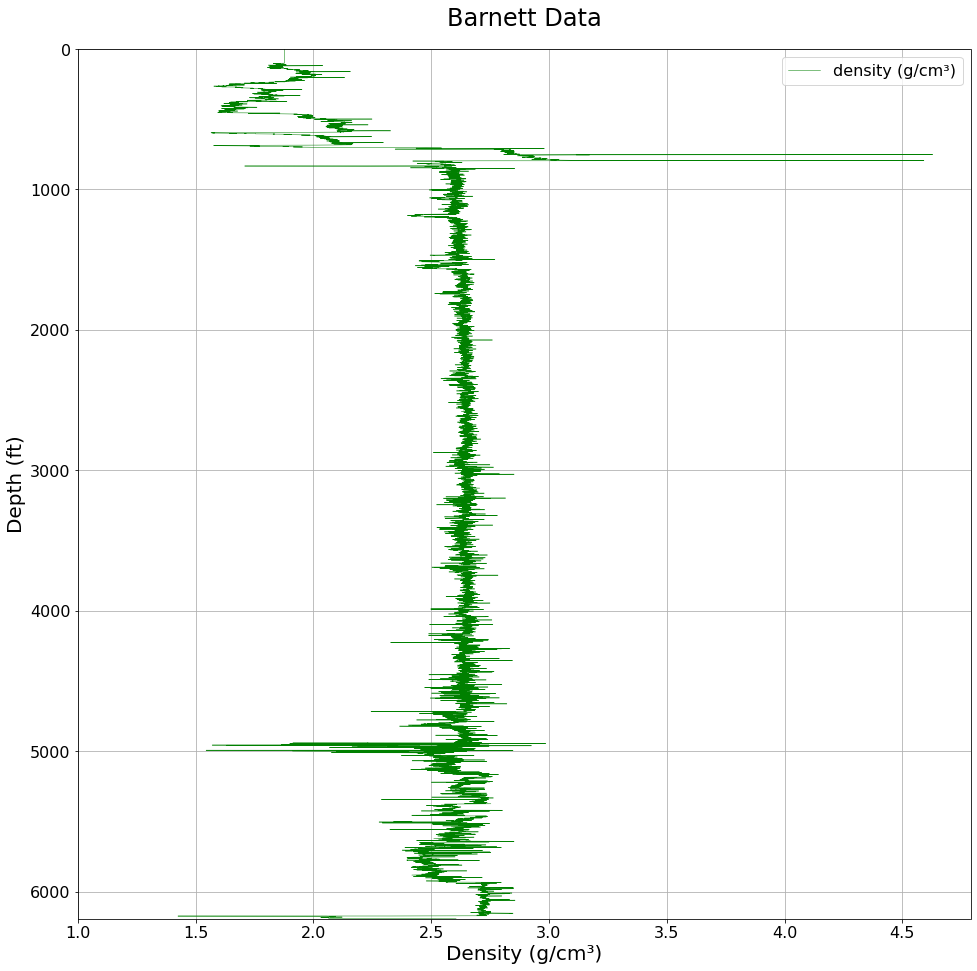

In [14]:
# Plot:
plot_profile("Barnett Data", barnett["depth_ft"], barnett["density_gcm3"])

#### GOM data:<br>

**"_GOM data – use a density of 1.0 g/cm³ from the surface to the sea floor (depth of 1000ft) and a formation density of 1.7g/cm³ at the sea floor. Linearly interpolate the density between the sea floor and the depth at which the data starts (at the depth of 3515 ft)._"**

In [15]:
# Create a vector that represents the depth from the sea surface to the bottom:
gom_sea_depth =  np.arange(0, 1001, 1, dtype=np.float32)
gom_sea_depth

array([   0.,    1.,    2., ...,  998.,  999., 1000.], dtype=float32)

In [16]:
# Create a vector that represents the sea water density (constant = 1.0g/cm^3):
gom_sea_density = np.full(gom_sea_depth.shape, fill_value=1.0, dtype=np.float32)
gom_sea_density

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [17]:
# Create the sea dataframe:
gom_sea = pd.DataFrame({"depth_ft": gom_sea_depth, "density_gcm3": gom_sea_density})
# Take a look:
gom_sea.head()

,depth_ft,density_gcm3
0,0.0,1.0
1,1.0,1.0
2,2.0,1.0
3,3.0,1.0
4,4.0,1.0


In [18]:
# Create a vector that represents the depth from the sea bottom to the first given point:
gom_surface_depth = np.arange(1000, 3515, 1, dtype=np.float32)
gom_surface_depth
# z_surface = np.arange(1000, 3515, 1)

array([1000., 1001., 1002., ..., 3512., 3513., 3514.], dtype=float32)

In [19]:
# Create a vector that represents the density from the sea bottom to the first given point interpolating linearly:
gom_surface_density = np.linspace(1.7, gom_bottom[gom_bottom.depth_ft == 3515].density_gcm3[0], num=gom_surface_depth.shape[0], endpoint=True, dtype=np.float32)
gom_surface_density

array([1.7      , 1.7001805, 1.7003611, ..., 2.1536388, 2.1538193,
       2.154    ], dtype=float32)

In [20]:
# Create the surface dataframe:
gom_surface = pd.DataFrame({"depth_ft": gom_surface_depth, "density_gcm3": gom_surface_density})
# Take a look:
gom_surface.head()

,depth_ft,density_gcm3
0,1000.0,1.700000
1,1001.0,1.700181
2,1002.0,1.700361
3,1003.0,1.700542
4,1004.0,1.700722


In [21]:
# Concatenate the, sea, surface, and bottom dataframes:
gom = pd.concat([gom_sea, gom_surface, gom_bottom], ignore_index=True)
# Take a look:
gom.head()

,depth_ft,density_gcm3
0,0.0,1.0
1,1.0,1.0
2,2.0,1.0
3,3.0,1.0
4,4.0,1.0


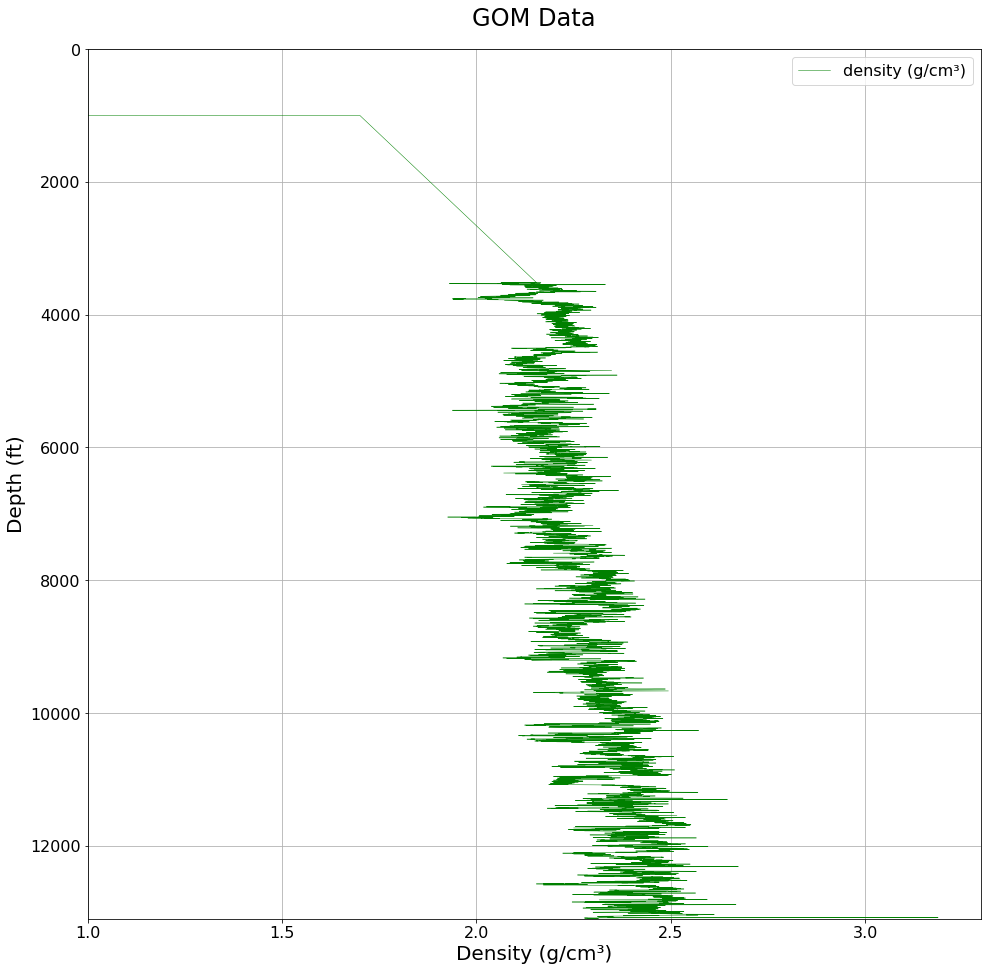

In [22]:
# Plot:
plot_profile("GOM Data", gom["depth_ft"], gom["density_gcm3"])

___

### 2.“Block” the log into 5 depth units <a class="anchor" id="plot-chunks"></a>

**"_“Block” the log into 5 depth units by assuming an approximately constant density over a given range of depths. Compute and plot the averaged density in each block and your blocked density as a function of depth for each dataset._"**

#### Barnett data:<br>

Inspecting the Barnett chart visually:

In [23]:
# Depths to brake. Bear in mind that the first and the last datapoints are the limits.
barnett_edges = [-100, 800., 1200., 4900., 5900., 7000.]
# Labels for each block:
blocks = ["block_01", "block_02", "block_03", "block_04", "block_05"]

In [24]:
# Break the data into blocks, according to its depth:
barnett["block"] = pd.cut(barnett["depth_ft"],
                          barnett_edges, 
                          labels=blocks)
# Take a look:
barnett.head()

,depth_ft,density_gcm3,block
0,0.0,1.8778,block_01
1,0.5,1.8778,block_01
2,1.0,1.8778,block_01
3,1.5,1.8778,block_01
4,2.0,1.8778,block_01


In [25]:
# Compute the density of each block:
for block in blocks:
    barnett.loc[barnett.block == block, "block_density_gcm3"] = barnett.loc[barnett.block == block, "density_gcm3"].mean()
# Check:
barnett.head()

,depth_ft,density_gcm3,block,block_density_gcm3
0,0.0,1.8778,block_01,2.012928
1,0.5,1.8778,block_01,2.012928
2,1.0,1.8778,block_01,2.012928
3,1.5,1.8778,block_01,2.012928
4,2.0,1.8778,block_01,2.012928


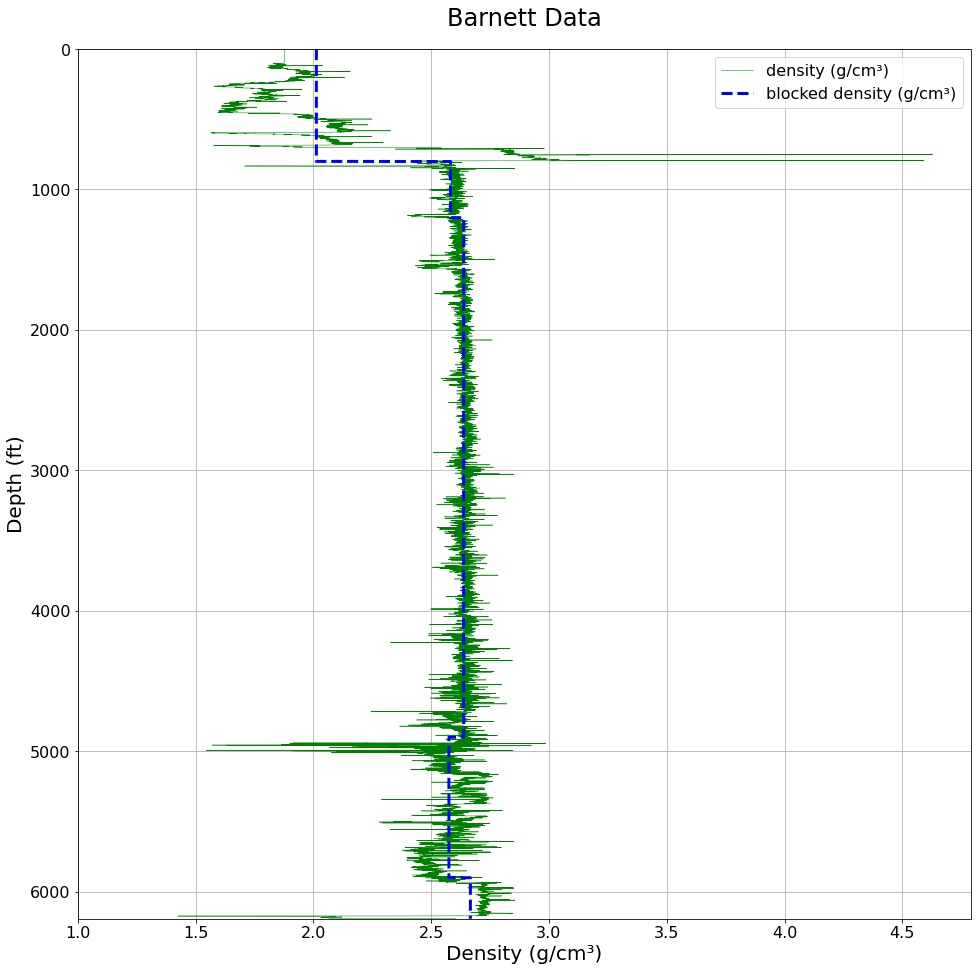

In [26]:
# Plot:
plot_profile("Barnett Data", barnett["depth_ft"], barnett["density_gcm3"], barnett["block_density_gcm3"])

#### GOM data:<br>

In [27]:
# Depths to brake. Bear in mind that the first and the last datapoints are the limits.
gom_edges = [-100, 1000., 3515., 8000., 11000., 20000.]

In [28]:
# Break the data into blocks, according to its depth:
gom["block"] = pd.cut(gom["depth_ft"],
                      gom_edges, 
                      labels=blocks)
# Take a look:
gom.head()

,depth_ft,density_gcm3,block
0,0.0,1.0,block_01
1,1.0,1.0,block_01
2,2.0,1.0,block_01
3,3.0,1.0,block_01
4,4.0,1.0,block_01


In [29]:
# Compute the density of each block:
for block in blocks:
    gom.loc[gom.block == block, "block_density_gcm3"] = gom.loc[gom.block == block, "density_gcm3"].mean()
# Check:
gom.head()

,depth_ft,density_gcm3,block,block_density_gcm3
0,0.0,1.0,block_01,1.000699
1,1.0,1.0,block_01,1.000699
2,2.0,1.0,block_01,1.000699
3,3.0,1.0,block_01,1.000699
4,4.0,1.0,block_01,1.000699


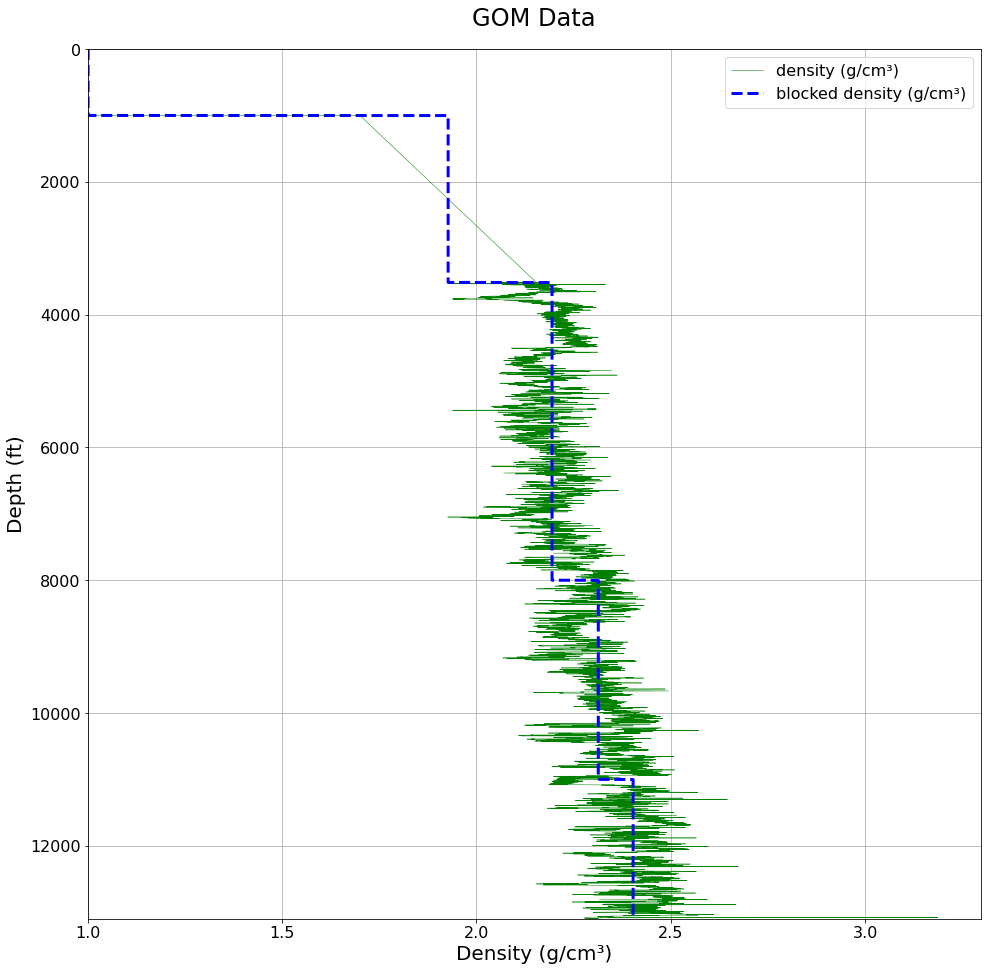

In [30]:
# Plot:
plot_profile("GOM Data", gom["depth_ft"], gom["density_gcm3"], gom["block_density_gcm3"])

___

### 3. Calculate and plot the overburden stress <a class="anchor" id="overburden-stress"></a>

**"_Calculate and plot the overburden stress as a function of depth using both the “blocked”
log and the continuous densities for each dataset. On the same plot, show hydrostatic
pore pressure 0.44 psi/ft versus depth as a reference. Use 9.8 m/s2 to approximate g, the
acceleration due to gravity._"**

Set some constants to help with the calculations.

In [31]:
# Acceleration due to gravity:
g = 9.80  # m/2^2

In [32]:
# Hydrostatic gradient:
h = 0.44  # psi/ft

In [33]:
# Constant to convert FROM: (g/cm^3) * (m/s^2) * ft TO: psi
c1 = 1/1000  # 1000g = 1kg
c2 = 1/(1000000) # 1m^3 = 10^6m^3
c3 = 0.3048  # 1ft = 0.3048cm
# kg * m/s^2 = N
# N / m^2 = Pa
c4 = 0.000145038  # 1Pa = 1N/m^2 = 0.000145038psi
c = c1 / c2 * c3 *  c4
c

0.04420758240000001

Define a function to calculate the overburden stresses and hydrostatic pore pressure.

In [34]:
def set_overburden_and_hydrostatic(df, g, h, c):    
    dz = (df.depth_ft.iloc[1] - df.depth_ft.iloc[0])
    # Calculate the overburden stress:
    df["overburden_stress_psi"] = (df.density_gcm3 * g * dz * c).cumsum()   
    # Calculate the blocked overburden stress:
    df["block_overburden_stress_psi"] = (df.block_density_gcm3 * g * dz * c).cumsum()   
    # Hydrostatic pore pressure:
    df["hydrostatic"] = pd.Series([0.44 * dz for _ in range(len(df))]).cumsum()  # psi
    return df

Define a function to plot the overburden stresses and hydrostatic pore pressure.

In [35]:
def plot_overburden_and_hydrostatic(title, y, x1, x2, x3):
    """Function to plot the data."""    
    plt.figure(figsize=(16,16))
    # Plot the overburden stress in psi:
    plt.plot(x1, y, 
             color="blue", 
             linewidth=3.0,
             label="overburden stress")
    # Plot the blocked overburden stress in psi:
    plt.plot(x2, y, 
             "r--", 
             linewidth=3.0,
             label="blocked overburden stress")
    # Plot the hydrostatic pore pressure:
    plt.plot(x3, y,
             "g--",
             linewidth=3.0,
             label="hydrostatic pore pressure")
    
    # Set the Y  limits and reverse it:
    plt.ylim(np.int(np.ceil(np.max(y)/1000.))*1000, 0)
    x_max = max(np.max(x1), np.max(x2), np.max(x3))
    x_max = np.int(np.ceil(x_max/1000)) * 1000
    plt.xlim(0, x_max)
    # Set the figure title:
    plt.title(title, y= 1.02, fontsize=24)
    # Set X and Y titles and font sizes:
    plt.xlabel("Stress (psi)", fontsize=20)
    plt.ylabel("Depth (ft)", fontsize=20)
    # Set the grid properties
    plt.grid(True)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    # Insert a legend:
    plt.legend(prop={'size': 16})

#### Barnett data:<br>

In [36]:
# Perform the calculations:
barnett = set_overburden_and_hydrostatic(barnett, g, h, c)
# Check:
barnett

,depth_ft,density_gcm3,block,block_density_gcm3,overburden_stress_psi,block_overburden_stress_psi,hydrostatic
0,0.0,1.8778,block_01,2.012928,0.406764,0.436035,0.22
1,0.5,1.8778,block_01,2.012928,0.813527,0.872070,0.44
2,1.0,1.8778,block_01,2.012928,1.220291,1.308104,0.66
3,1.5,1.8778,block_01,2.012928,1.627055,1.744139,0.88
4,2.0,1.8778,block_01,2.012928,2.033818,2.180174,1.10
...,...,...,...,...,...,...,...
12383,6191.5,2.0703,block_05,2.666482,6826.947721,6826.622833,2724.48
12384,6192.0,2.0857,block_05,2.666482,6827.399520,6827.200439,2724.70
12385,6192.5,2.1434,block_05,2.666482,6827.863817,6827.778044,2724.92
12386,6193.0,2.3314,block_05,2.666482,6828.368838,6828.355650,2725.14


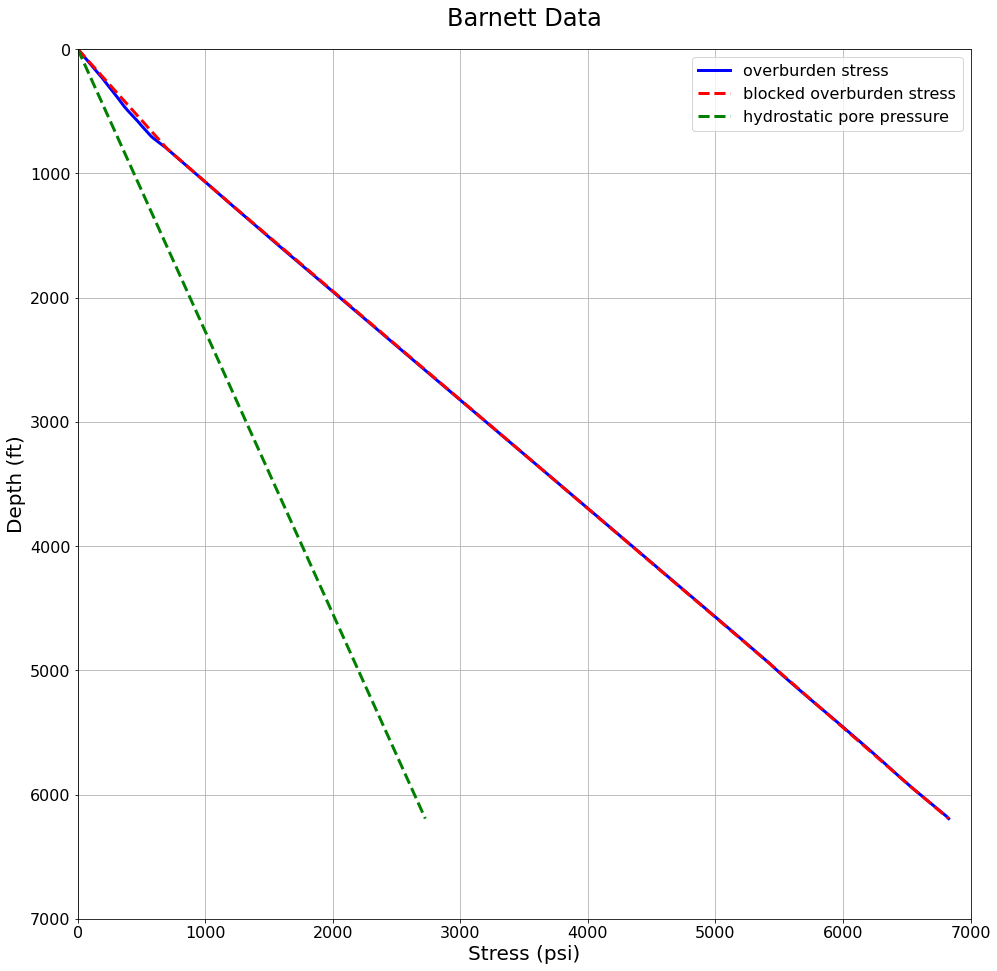

In [37]:
# Plot:
plot_overburden_and_hydrostatic("Barnett Data", 
                                barnett["depth_ft"], 
                                barnett["overburden_stress_psi"], 
                                barnett["block_overburden_stress_psi"], 
                                barnett["hydrostatic"])

#### GOM data:<br>

In [38]:
# Perform the calculations:
gom = set_overburden_and_hydrostatic(gom, g, h, c)
# Check:
gom

,depth_ft,density_gcm3,block,block_density_gcm3,overburden_stress_psi,block_overburden_stress_psi,hydrostatic
0,0.0,1.000,block_01,1.000699,0.433234,0.433537,0.44
1,1.0,1.000,block_01,1.000699,0.866469,0.867074,0.88
2,2.0,1.000,block_01,1.000699,1.299703,1.300611,1.32
3,3.0,1.000,block_01,1.000699,1.732937,1.734148,1.76
4,4.0,1.000,block_01,1.000699,2.166172,2.167685,2.20
...,...,...,...,...,...,...,...
13097,13096.0,2.314,block_05,2.403178,11987.818571,11987.631539,5763.12
13098,13097.0,2.314,block_05,2.403178,11988.821075,11988.672678,5763.56
13099,13098.0,2.294,block_05,2.403178,11989.814915,11989.713817,5764.00
13100,13099.0,2.294,block_05,2.403178,11990.808754,11990.754956,5764.44


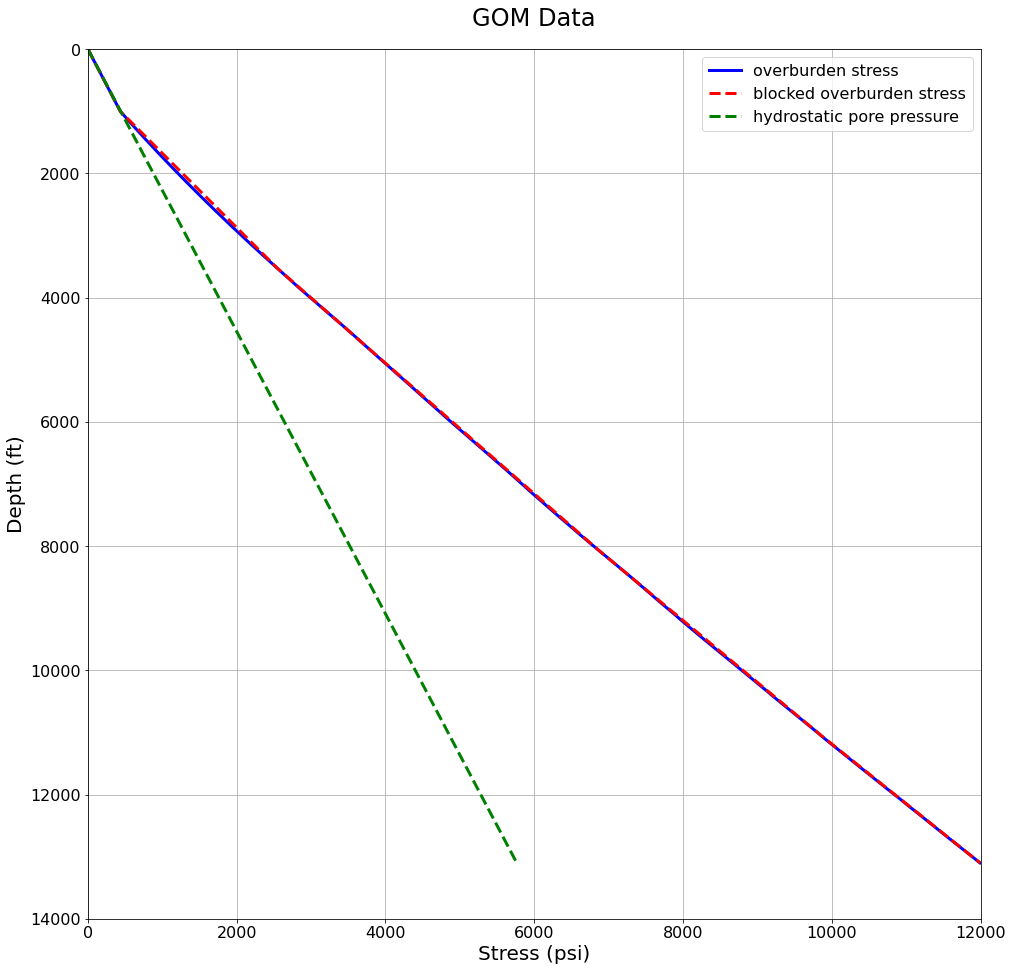

In [39]:
# Plot:
plot_overburden_and_hydrostatic("GOM Data", 
                                gom["depth_ft"], 
                                gom["overburden_stress_psi"], 
                                gom["block_overburden_stress_psi"], 
                                gom["hydrostatic"])

___

### 4. Calculate the overburden gradient <a class="anchor" id="overburden-gradient"></a>

"_Calculate the overburden gradient (overburden stress divided by the depth) for each data
set using the continuous density data. Plot the overburden gradient versus depth._"

___

## II. Compute porosity from density measurements <a class="anchor" id="compute-porosity"></a>

---

## III. Answer the questions <a class="anchor" id="answer"></a>

"_Use the calculations from I and II to answer the questions on the page below. The answers will
be posted a day after it is due. Numerical entry-type responses have a range of acceptable values
and are graded electronically, so please adhere to the value of constants given here. We will
specify the units that we want the answer in, so please do not write units in the answer, just write
the number._"

___

## References <a class="anchor" id="references"></a>

1. https://online.stanford.edu/courses/soeees-ygeoresgeo202-reservoir-geomechanics
1. https://www.edx.org/course/reservoir-geomechanics
2. https://pandas.pydata.org
3. https://numpy.org/
4. https://matplotlib.org/